In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

Load your dataset

In [213]:
data = pd.read_csv("LCV1.csv")

Features and Target variables

In [214]:
features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_2W','%_of_3W','%_of_4W']].values
target = data['SD'].values

Normalize data

In [215]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Split data into train and test sets

In [216]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

Reshape the input data for all models

In [217]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Define, Create and Evaluate Model

In [240]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(48, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train, epochs=500, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

Epoch 1/500
3/3 [==============================] - 1s 114ms/step - loss: 385.1555 - val_loss: 330.5511
Epoch 2/500
3/3 [==============================] - 0s 18ms/step - loss: 384.2477 - val_loss: 329.7848
Epoch 3/500
3/3 [==============================] - 0s 18ms/step - loss: 383.4264 - val_loss: 328.8156
Epoch 4/500
3/3 [==============================] - 0s 15ms/step - loss: 382.2190 - val_loss: 327.5382
Epoch 5/500
3/3 [==============================] - 0s 26ms/step - loss: 380.7415 - val_loss: 325.7451
Epoch 6/500
3/3 [==============================] - 0s 17ms/step - loss: 378.6444 - val_loss: 323.1405
Epoch 7/500
3/3 [==============================] - 0s 9ms/step - loss: 375.2349 - val_loss: 319.2410
Epoch 8/500
3/3 [==============================] - 0s 9ms/step - loss: 370.5839 - val_loss: 313.2510
Epoch 9/500
3/3 [==============================] - 0s 8ms/step - loss: 362.7136 - val_loss: 303.4109
Epoch 10/500
3/3 [==============================] - 0s 9ms/step - loss: 350.2083 - v

Visualize LSTM results

0.6255437921309916


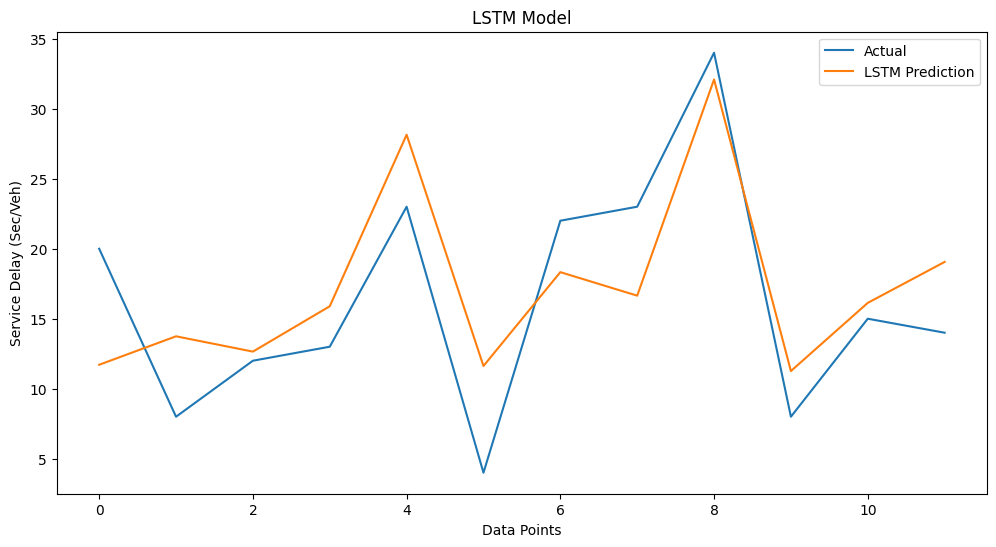

In [241]:
print(r2_lstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('LSTM Model')
plt.show()

In [220]:
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_lstm, y_train, epochs=150, batch_size=8, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bilstm = bilstm_model.predict(X_test_lstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm=np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)


Epoch 1/150
6/6 [==============================] - 3s 93ms/step - loss: 383.9746 - val_loss: 327.4389
Epoch 2/150
6/6 [==============================] - 0s 7ms/step - loss: 378.5224 - val_loss: 321.1905
Epoch 3/150
6/6 [==============================] - 0s 7ms/step - loss: 369.5282 - val_loss: 307.6158
Epoch 4/150
6/6 [==============================] - 0s 10ms/step - loss: 347.3566 - val_loss: 269.8230
Epoch 5/150
6/6 [==============================] - 0s 10ms/step - loss: 273.7872 - val_loss: 137.1579
Epoch 6/150
6/6 [==============================] - 0s 10ms/step - loss: 146.0872 - val_loss: 130.4700
Epoch 7/150
6/6 [==============================] - 0s 11ms/step - loss: 73.0329 - val_loss: 47.5407
Epoch 8/150
6/6 [==============================] - 0s 9ms/step - loss: 81.0549 - val_loss: 40.9056
Epoch 9/150
6/6 [==============================] - 0s 11ms/step - loss: 55.6589 - val_loss: 41.9998
Epoch 10/150
6/6 [==============================] - 0s 7ms/step - loss: 57.9501 - val_loss:

Visualize BiLSTM results

0.661646109040015


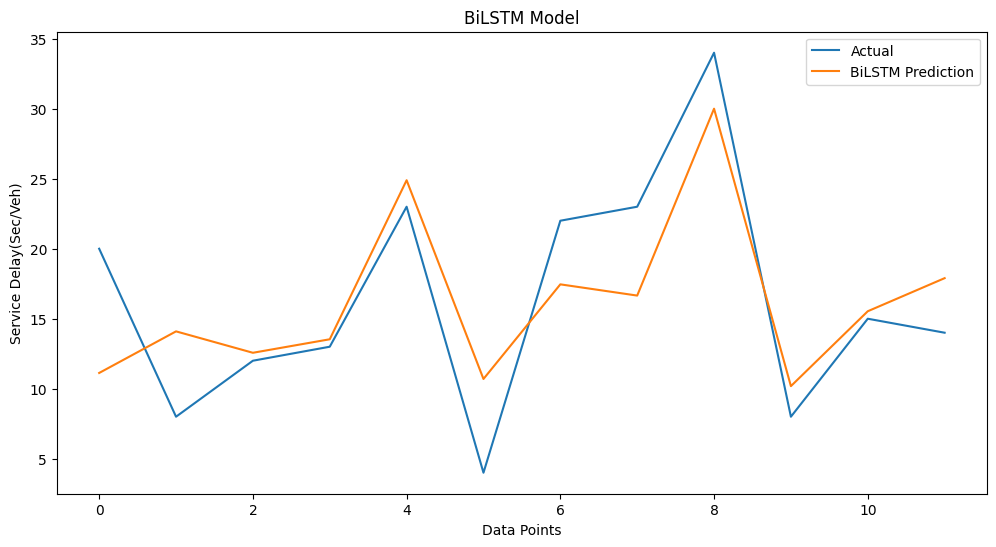

In [221]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

0.661646109040015


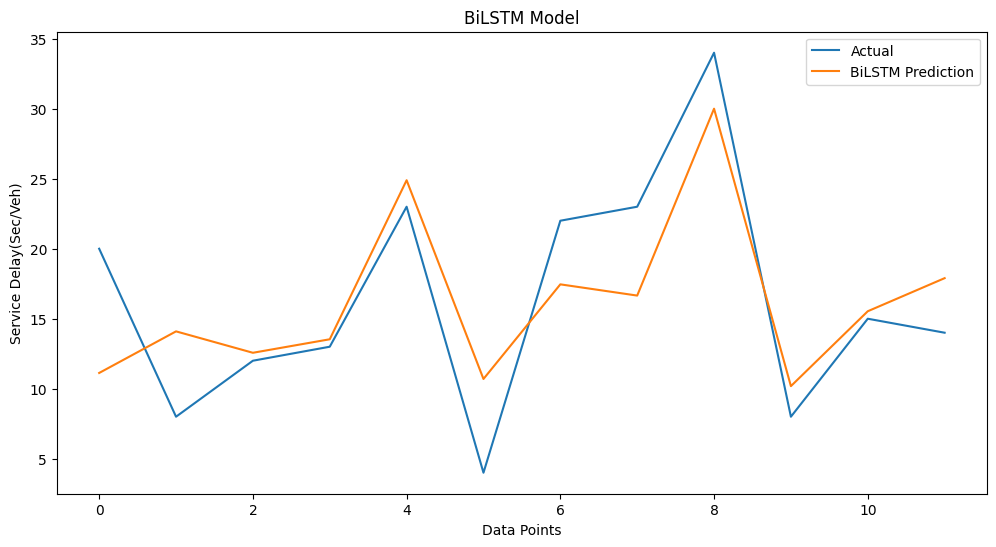

In [222]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

In [286]:
def create_gru_model():
    model = Sequential()
    model.add(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    model.add(GRU(48, activation='relu', return_sequences=False))  
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = create_gru_model()
gru_model.fit(X_train_lstm, y_train, epochs=300, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_gru = gru_model.predict(X_test_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru=np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

Epoch 1/300
2/2 [==============================] - 2s 217ms/step - loss: 383.8984 - val_loss: 328.4684
Epoch 2/300
2/2 [==============================] - 0s 20ms/step - loss: 382.0917 - val_loss: 326.6142
Epoch 3/300
2/2 [==============================] - 0s 34ms/step - loss: 379.9922 - val_loss: 324.4917
Epoch 4/300
2/2 [==============================] - 0s 33ms/step - loss: 377.7311 - val_loss: 322.0055
Epoch 5/300
2/2 [==============================] - 0s 27ms/step - loss: 375.1246 - val_loss: 319.0828
Epoch 6/300
2/2 [==============================] - 0s 31ms/step - loss: 371.7870 - val_loss: 315.6288
Epoch 7/300
2/2 [==============================] - 0s 17ms/step - loss: 368.0480 - val_loss: 311.4532
Epoch 8/300
2/2 [==============================] - 0s 25ms/step - loss: 363.4527 - val_loss: 306.2840
Epoch 9/300
2/2 [==============================] - 0s 18ms/step - loss: 357.7637 - val_loss: 299.7911
Epoch 10/300
2/2 [==============================] - 0s 17ms/step - loss: 350.5195

Visualize GRU results

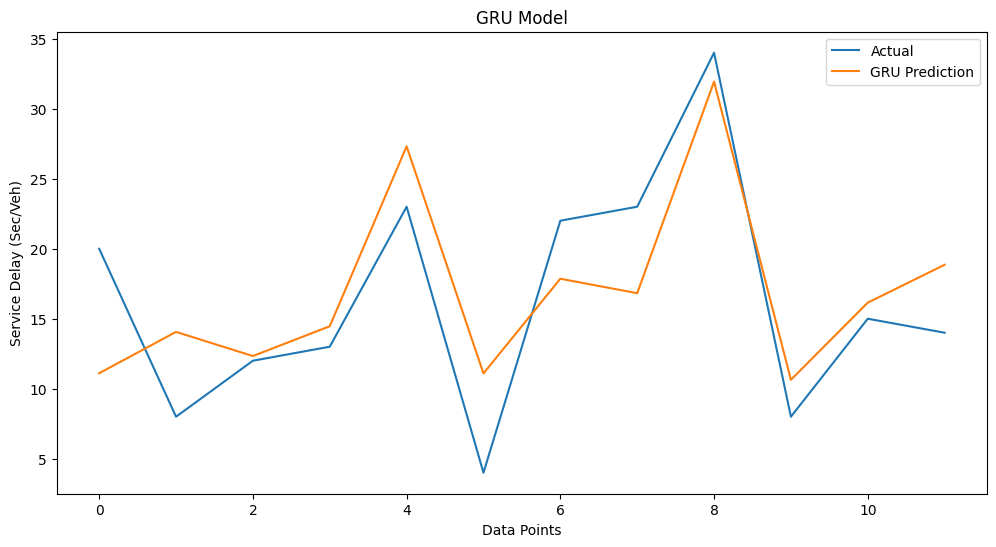

In [287]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gru, label='GRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('GRU Model')
plt.show()

In [252]:
def create_bigru_model():
    model = Sequential()
    model.add(Bidirectional(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(GRU(48, activation='relu', return_sequences=False))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bigru_model = create_bigru_model()
bigru_model.fit(X_train_lstm, y_train, epochs=300, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bigru = bigru_model.predict(X_test_lstm)
mae_bigru = mean_absolute_error(y_test, y_pred_bigru)
mse_bigru = mean_squared_error(y_test, y_pred_bigru)
rmse_bigru=np.sqrt(mse_bigru)
r2_bigru = r2_score(y_test, y_pred_bigru)

Epoch 1/300
3/3 [==============================] - 3s 245ms/step - loss: 383.8546 - val_loss: 327.5230
Epoch 2/300
3/3 [==============================] - 0s 17ms/step - loss: 380.0634 - val_loss: 323.5891
Epoch 3/300
3/3 [==============================] - 0s 17ms/step - loss: 375.7350 - val_loss: 318.4705
Epoch 4/300
3/3 [==============================] - 0s 16ms/step - loss: 369.4380 - val_loss: 311.2560
Epoch 5/300
3/3 [==============================] - 0s 17ms/step - loss: 360.5744 - val_loss: 300.7990
Epoch 6/300
3/3 [==============================] - 0s 15ms/step - loss: 348.0175 - val_loss: 285.2846
Epoch 7/300
3/3 [==============================] - 0s 15ms/step - loss: 328.9138 - val_loss: 261.6554
Epoch 8/300
3/3 [==============================] - 0s 16ms/step - loss: 299.3318 - val_loss: 224.6218
Epoch 9/300
3/3 [==============================] - 0s 15ms/step - loss: 252.8483 - val_loss: 165.4571
Epoch 10/300
3/3 [==============================] - 0s 18ms/step - loss: 178.7563

Visualize BiGRU results

0.6378254162866688


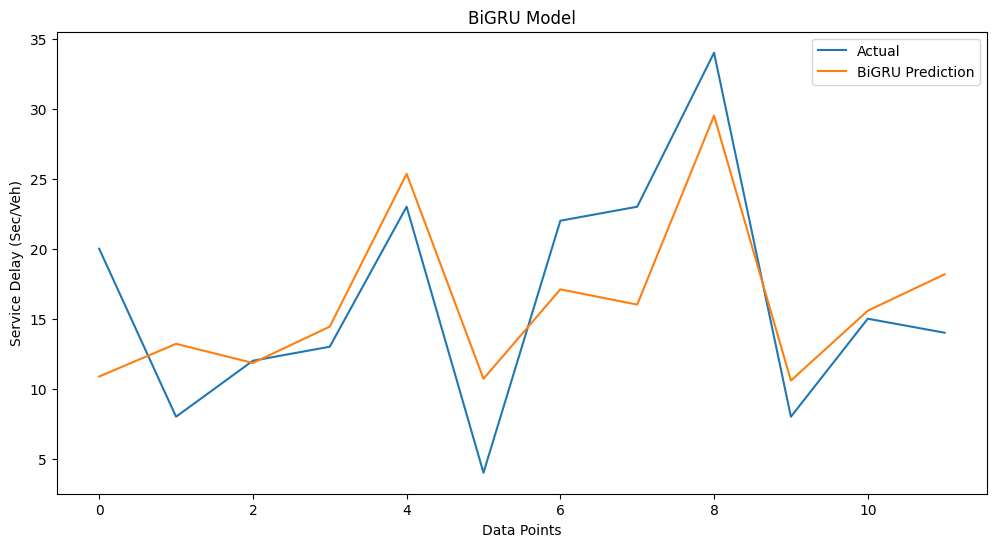

In [253]:
print(r2_bigru)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bigru, label='BiGRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('BiGRU Model')
plt.show()

In [227]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_model = create_cnn_model()
cnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=800, batch_size=16, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

y_pred_cnn = cnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn=np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

Epoch 1/800
3/3 [==============================] - 0s 54ms/step - loss: 383.0932 - val_loss: 324.8445
Epoch 2/800
3/3 [==============================] - 0s 10ms/step - loss: 376.2935 - val_loss: 317.9231
Epoch 3/800
3/3 [==============================] - 0s 9ms/step - loss: 368.7679 - val_loss: 310.8753
Epoch 4/800
3/3 [==============================] - 0s 16ms/step - loss: 361.5062 - val_loss: 302.9460
Epoch 5/800
3/3 [==============================] - 0s 8ms/step - loss: 352.2444 - val_loss: 293.6698
Epoch 6/800
3/3 [==============================] - 0s 11ms/step - loss: 342.6997 - val_loss: 282.8329
Epoch 7/800
3/3 [==============================] - 0s 16ms/step - loss: 330.1634 - val_loss: 270.3909
Epoch 8/800
3/3 [==============================] - 0s 8ms/step - loss: 316.4104 - val_loss: 256.1049
Epoch 9/800
3/3 [==============================] - 0s 16ms/step - loss: 300.0446 - val_loss: 240.0166
Epoch 10/800
3/3 [==============================] - 0s 16ms/step - loss: 282.4496 - v

Visualize CNN results

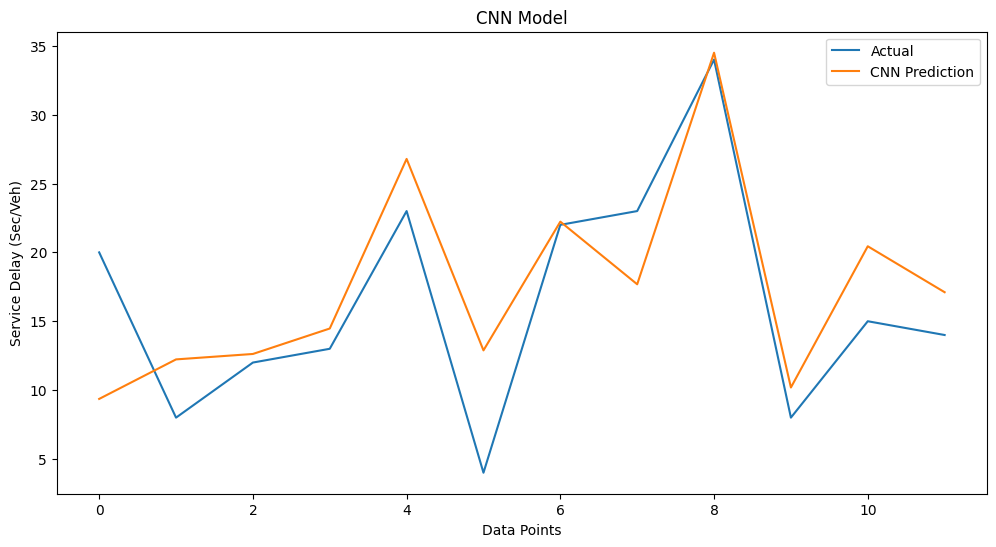

In [228]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn, label='CNN Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN Model')
plt.show()

In [229]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_lstm_model = create_cnn_lstm_model()
cnn_lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_lstm)
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
rmse_cnn_lstm=np.sqrt(mse_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

Epoch 1/800
3/3 [==============================] - 1s 77ms/step - loss: 384.6985 - val_loss: 329.5901
Epoch 2/800
3/3 [==============================] - 0s 15ms/step - loss: 382.9914 - val_loss: 327.9793
Epoch 3/800
3/3 [==============================] - 0s 16ms/step - loss: 381.2787 - val_loss: 326.1326
Epoch 4/800
3/3 [==============================] - 0s 8ms/step - loss: 379.2643 - val_loss: 323.9889
Epoch 5/800
3/3 [==============================] - 0s 8ms/step - loss: 376.8505 - val_loss: 321.3392
Epoch 6/800
3/3 [==============================] - 0s 11ms/step - loss: 373.7560 - val_loss: 317.9655
Epoch 7/800
3/3 [==============================] - 0s 13ms/step - loss: 370.0709 - val_loss: 313.4958
Epoch 8/800
3/3 [==============================] - 0s 16ms/step - loss: 364.5853 - val_loss: 307.4991
Epoch 9/800
3/3 [==============================] - 0s 8ms/step - loss: 357.6538 - val_loss: 299.1938
Epoch 10/800
3/3 [==============================] - 0s 8ms/step - loss: 347.5500 - va

Visualize CNN_LSTM results

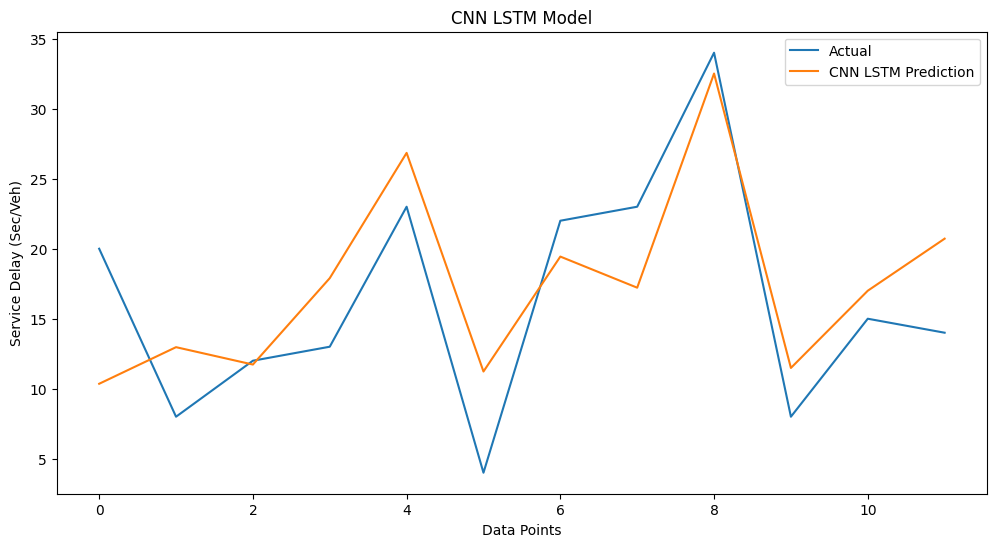

In [230]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_lstm, label='CNN LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN LSTM Model')
plt.show()

In [277]:
def create_cnn_bilstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_bilstm_model = create_cnn_bilstm_model()
cnn_bilstm_model.fit(X_train_lstm, y_train, epochs=200, batch_size=8, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_lstm)
mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm=np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

Epoch 1/200
6/6 [==============================] - 1s 51ms/step - loss: 382.8291 - val_loss: 326.2434
Epoch 2/200
6/6 [==============================] - 0s 8ms/step - loss: 377.0000 - val_loss: 320.0181
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 369.6598 - val_loss: 309.8159
Epoch 4/200
6/6 [==============================] - 0s 8ms/step - loss: 354.4492 - val_loss: 291.4369
Epoch 5/200
6/6 [==============================] - 0s 10ms/step - loss: 329.9516 - val_loss: 254.9833
Epoch 6/200
6/6 [==============================] - 0s 9ms/step - loss: 274.4913 - val_loss: 178.4286
Epoch 7/200
6/6 [==============================] - 0s 7ms/step - loss: 167.9671 - val_loss: 43.3640
Epoch 8/200
6/6 [==============================] - 0s 7ms/step - loss: 82.8710 - val_loss: 80.5931
Epoch 9/200
6/6 [==============================] - 0s 6ms/step - loss: 63.0842 - val_loss: 27.0291
Epoch 10/200
6/6 [==============================] - 0s 7ms/step - loss: 59.9243 - val_loss: 35

Visualize CNN_BiLSTM results

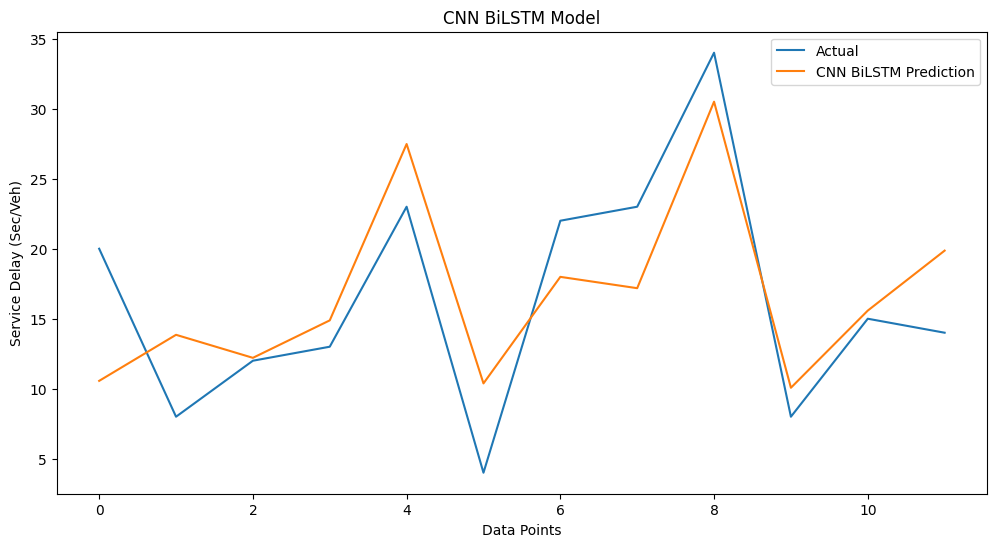

In [278]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_bilstm, label='CNN BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN BiLSTM Model')
plt.show()

Visualize metrics

In [290]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

Plot MAE

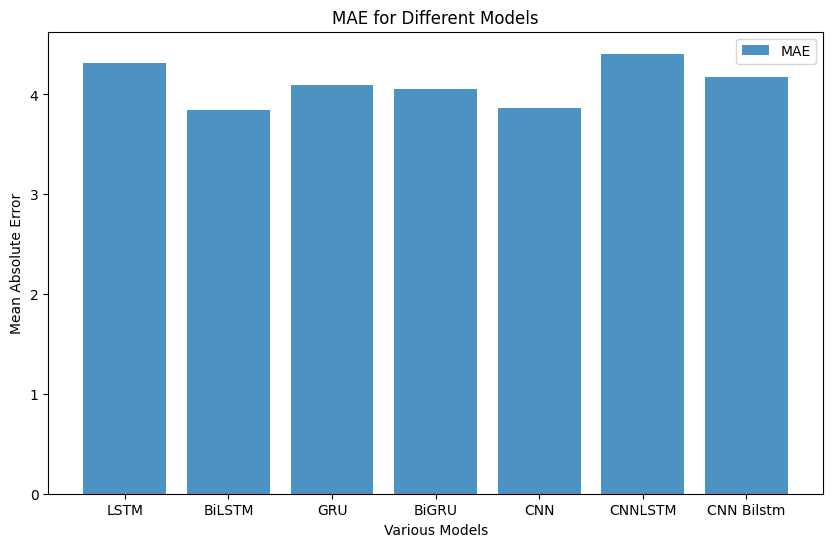

In [291]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, alpha=0.8, label='MAE')
plt.title('MAE for Different Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Various Models')
plt.legend()
plt.show()

Plot MSE

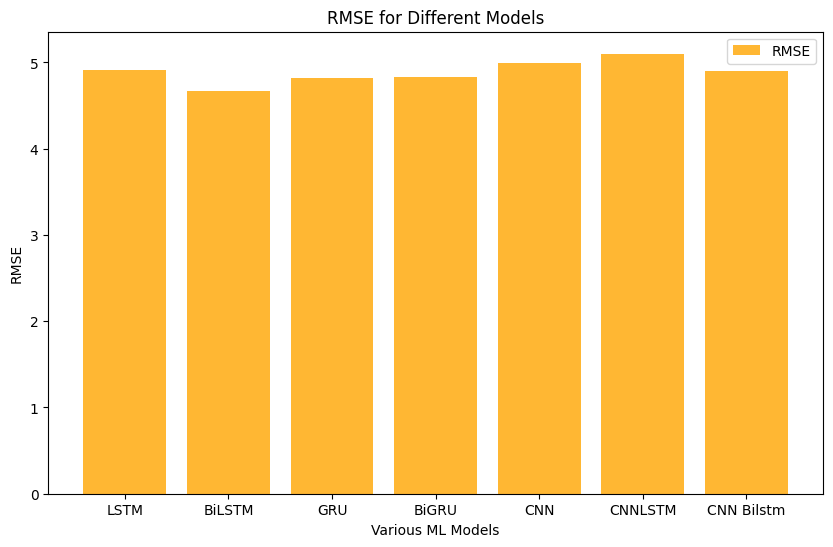

In [292]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.8, label='RMSE', color='orange')
plt.title('RMSE for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Various ML Models')
plt.legend()
plt.show()

Plot R2 Score

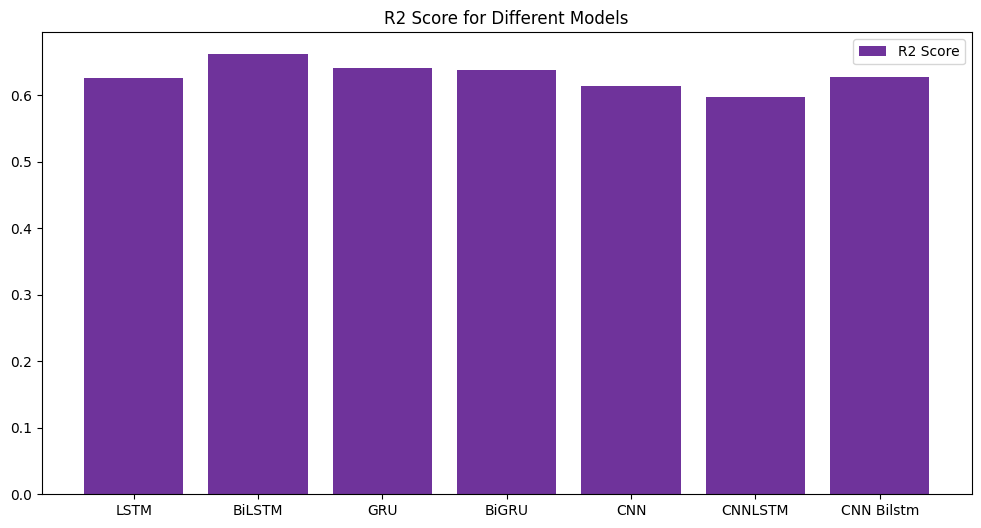

In [293]:
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, alpha=0.8, label='R2 Score', color='indigo')
plt.title('R2 Score for Different Models')
plt.legend()
plt.show()

Print Metrics

In [294]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 4.311088641484578
LSTM MSE: 4.9166277599804555
LSTM R2 Score: 0.6255437921309916

BiLSTM MAE: 3.847047805786133
BiLSTM MSE: 4.673609248247622
BiLSTM R2 Score: 0.661646109040015

GRU MAE: 4.098098675409953
GRU MSE: 4.816124087706098
GRU R2 Score: 0.6406962804584406

BiGRU MAE: 4.058734099070231
BiGRU MSE: 4.835326406739897
BiGRU R2 Score: 0.6378254162866688

CNN MAE: 3.8685181935628257
CNN MSE: 4.996487425377284
CNN R2 Score: 0.6132805863552842

CNN LSTM MAE: 4.407756010691325
CNN LSTM MSE: 5.101692386571956
CNN LSTM R2 Score: 0.5968237747592835

CNN BiLSTM MAE: 4.173080285390218
CNN BiLSTM MSE: 4.906137875323726
CNN BiLSTM R2 Score: 0.6271399317294768


Plot predictions for each model

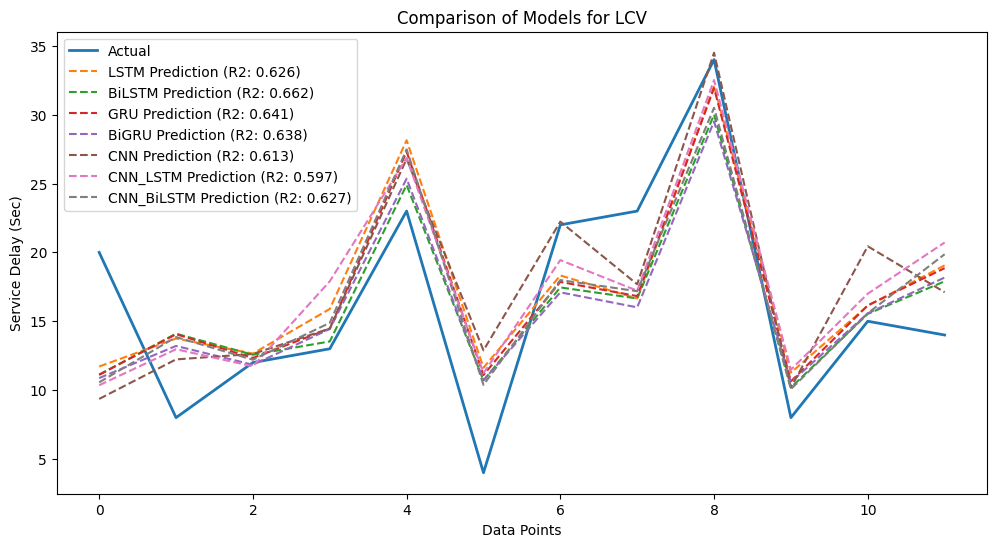

In [297]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(y_pred_lstm, label=f'LSTM Prediction (R2: {r2_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_bilstm, label=f'BiLSTM Prediction (R2: {r2_bilstm:.3f})', linestyle='dashed')
plt.plot(y_pred_gru, label=f'GRU Prediction (R2: {r2_gru:.3f})', linestyle='dashed')
plt.plot(y_pred_bigru, label=f'BiGRU Prediction (R2: {r2_bigru:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn, label=f'CNN Prediction (R2: {r2_cnn:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_lstm, label=f'CNN_LSTM Prediction (R2: {r2_cnn_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_bilstm, label=f'CNN_BiLSTM Prediction (R2: {r2_cnn_bilstm:.3f})', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec)')
plt.legend()
plt.title('Comparison of Models for LCV')
plt.show()

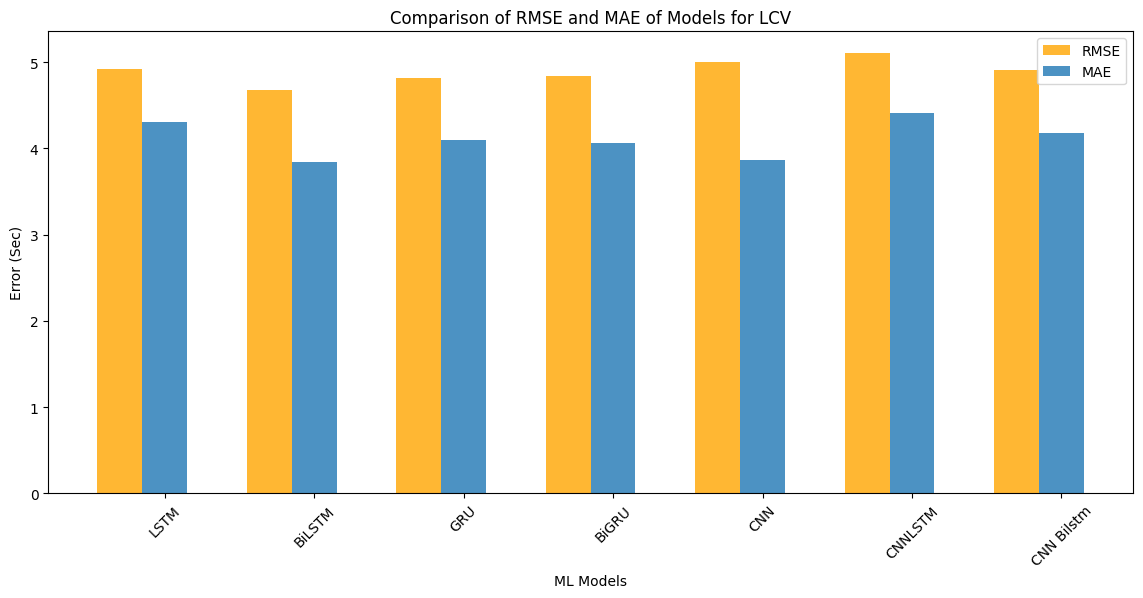

In [296]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(14, 6))

# Plot MSE
plt.bar(index, mse_values, width=bar_width, alpha=0.8, label='RMSE', color='orange')

# Plot MAE
plt.bar(index + bar_width, mae_values, width=bar_width, alpha=0.8, label='MAE')

# Plot R2
#plt.bar(index + 2*bar_width, r2_values, width=bar_width, alpha=0.8, label='R2')

plt.xlabel('ML Models')
plt.ylabel('Error (Sec)')
plt.title('Comparison of RMSE and MAE of Models for LCV')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

plt.show()